In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from deepracer.tracks import TrackIO, Track
from deepracer.logs import PlottingUtils as pu
tu = TrackIO()

# Ignore deprecation warnings we have no power over
import warnings
warnings.filterwarnings('ignore')

In [2]:
#copy waypoints from logfile where print(params) was applied
a = {'waypoints': [(1.3333835005760193, -2.8131200075149536), (1.183136522769928, -2.8104419708251953), (1.0328985452651978, -2.8073339462280273), (0.8826694488525391, -2.8037965297698975), (0.7324512302875519, -2.7998324632644653), (0.5822446346282959, -2.795442581176758), (0.43205125629901886, -2.790626049041748), (0.28187204897403717, -2.7853859663009644), (0.1317080482840538, -2.7797240018844604), (-0.018439327308443748, -2.773640990257263), (-0.16856930404901505, -2.7671384811401367), (-0.3186803460121155, -2.7602174282073975), (-0.4687718003988266, -2.752879023551941), (-0.6188421547412863, -2.7451255321502686), (-0.7688906490802765, -2.736956477165222), (-0.918916046619416, -2.7283765077590942), (-1.0689175128936768, -2.719383478164673), (-1.2188935279846191, -2.709978461265564), (-1.3688434958457947, -2.7001705169677734), (-1.518767535686493, -2.6899704933166504), (-1.6686649918556213, -2.679384469985962), (-1.81853449344635, -2.668413519859314), (-1.9683744311332703, -2.6570465564727783), (-2.1181834936141968, -2.6452770233154297), (-2.2679595947265625, -2.6330960988998413), (-2.417701482772827, -2.6204994916915894), (-2.567407011985779, -2.607477068901062), (-2.717073917388916, -2.5940245389938354), (-2.8667010068893433, -2.580132007598877), (-3.016286015510559, -2.5657933950424194), (-3.165826916694641, -2.55100154876709), (-3.3153215646743774, -2.5357484817504883), (-3.464767575263977, -2.5200275182724), (-3.6141624450683594, -2.5038294792175293), (-3.763504981994629, -2.487149477005005), (-3.91279149055481, -2.469980478286743), (-4.0620200634002686, -2.452314019203186), (-4.211185693740845, -2.4341240525245667), (-4.360290288925171, -2.415440082550049), (-4.509342908859253, -2.3963409662246704), (-4.658298492431641, -2.376507520675659), (-4.807109355926514, -2.3556114435195923), (-4.955840349197388, -2.3341574668884277), (-5.104480028152466, -2.312079966068268), (-5.253018140792847, -2.289325475692749), (-5.401441335678101, -2.265836536884308), (-5.549736976623535, -2.2415549755096436), (-5.697891473770142, -2.216424524784088), (-5.845888376235962, -2.1903870701789856), (-5.9937145709991455, -2.163389027118683), (-6.141347169876099, -2.135358452796936), (-6.288777112960815, -2.106278955936432), (-6.435819625854492, -2.0753009915351868), (-6.5825934410095215, -2.0430755615234375), (-6.729026556015015, -2.009335935115814), (-6.875036954879761, -1.9738110303878784), (-7.020529508590698, -1.9362254738807678), (-7.165197134017944, -1.8955979943275452), (-7.308818578720093, -1.8514055609703064), (-7.451110363006592, -1.8031129837036133), (-7.5909364223480225, -1.7481164336204529), (-7.727766513824463, -1.686079502105713), (-7.727766513824463, -1.686079502105713), (-7.856920957565308, -1.6095080375671387), (-7.977625846862793, -1.5200110077857971), (-8.093506574630737, -1.424383521080017), (-8.201281785964966, -1.3197720050811768), (-8.297363042831421, -1.2043103873729706), (-8.375332593917847, -1.076109915971756), (-8.43245267868042, -0.937316358089447), (-8.455290794372559, -0.7892321944236755), (-8.440380096435547, -0.6400873363018036), (-8.393879413604736, -0.4975521117448807), (-8.320435047149658, -0.3666239082813263), (-8.229549169540405, -0.247076615691185), (-8.124029159545898, -0.14029400050640106), (-8.004223585128784, -0.049852460622787476), (-7.871027708053589, 0.019394755363464355), (-7.727550506591797, 0.06340639293193817), (-7.578822374343872, 0.08407171070575714), (-7.4286394119262695, 0.08685685694217682), (-7.278717517852783, 0.0770169347524643), (-7.129441022872925, 0.0598163902759552), (-6.980470895767212, 0.04008984565734863), (-6.8313210010528564, 0.02179799973964691), (-6.681668519973755, 0.008256793022155762), (-6.531569480895996, 0.001761898398399353), (-6.381423473358154, 0.006811007857322693), (-6.232259035110474, 0.024659261107444763), (-6.0851826667785645, 0.05523449182510376), (-5.941717147827148, 0.09974245727062225), (-5.803253412246704, 0.1580192893743515), (-5.669936418533325, 0.2272726371884346), (-5.542850017547607, 0.30738143250346184), (-5.4233434200286865, 0.39840188063681126), (-5.311339855194092, 0.4985453933477402), (-5.204833030700684, 0.6045348346233368), (-5.1034300327301025, 0.7154279202222824), (-5.005021810531616, 0.828989565372467), (-4.908114433288574, 0.9438363611698151), (-4.812690496444702, 1.0599212944507599), (-4.721093654632568, 1.1790093779563904), (-4.633294105529785, 1.3009589910507202), (-4.5494384765625, 1.4256490468978882), (-4.469991445541382, 1.55319344997406), (-4.395044445991516, 1.683433473110199), (-4.324705600738525, 1.8162175416946411), (-4.259069442749023, 1.9513899683952332), (-4.197442531585693, 2.0884334444999695), (-4.14072048664093, 2.2275819778442383), (-4.088095545768738, 2.3683329820632935), (-4.0387184619903564, 2.5102570056915283), (-3.9917094707489014, 2.6529849767684937), (-3.944936513900757, 2.795788049697876), (-3.896027445793152, 2.9378734827041626), (-3.842653512954712, 3.078333020210266), (-3.780505895614624, 3.215070962905884), (-3.706104040145874, 3.345482587814331), (-3.6119894981384277, 3.4624381065368652), (-3.49851655960083, 3.560504913330078), (-3.3678314685821533, 3.63430655002594), (-3.2269809246063232, 3.6862610578536987), (-3.0805399417877197, 3.719607949256897), (-2.9312095642089844, 3.7356314659118652), (-2.780982494354248, 3.7353185415267944), (-2.6313765048980713, 3.7215914726257324), (-2.4834614992141724, 3.695274591445923), (-2.3380539417266846, 3.6574660539627075), (-2.1957589387893677, 3.6092395782470703), (-2.0570455193519592, 3.5515090227127075), (-1.9229469895362854, 3.4837520122528076), (-1.7944029569625854, 3.405977487564087), (-1.6726014614105225, 3.318029046058655), (-1.5589314699172974, 3.2198050022125244), (-1.4549520015716553, 3.1113789081573486), (-1.3635019361972809, 2.9922410249710083), (-1.2850174009799957, 2.8641690015792847), (-1.2206261456012726, 2.7284740209579468), (-1.170849233865738, 2.5867420434951782), (-1.1326441168785095, 2.4414379596710205), (-1.1029407680034637, 2.294147491455078), (-1.080316573381424, 2.145597457885742), (-1.061771810054779, 1.996476948261261), (-1.0436577796936035, 1.847302496433258), (-1.0223358571529388, 1.6985580325126648), (-0.9943479299545288, 1.5509275197982788), (-0.9544088244438171, 1.406121015548706), (-0.9010416269302368, 1.2657185196876526), (-0.8303599208593369, 1.1332573592662811), (-0.740242138504982, 1.0132129788398743), (-0.6325599998235703, 0.908572793006897), (-0.512031614780426, 0.8190109580755234), (-0.3807812035083771, 0.7459684163331985), (-0.24241580814123154, 0.6875322312116623), (-0.09856204874813557, 0.6442952007055283), (0.048873916268348694, 0.6155547425150871), (0.19844739884138107, 0.6017441749572754), (0.34865395724773407, 0.6031065732240677), (0.49793843924999237, 0.6196897029876709), (0.6442790627479553, 0.6534091383218765), (0.78565314412117, 0.7040620595216751), (0.9182743430137634, 0.7744394242763519), (1.0384081304073334, 0.8644541203975677), (1.1440268158912659, 0.9712067544460297), (1.2361957132816315, 1.0898019671440125), (1.3161422610282898, 1.216987282037735), (1.3880065381526947, 1.3489454984664917), (1.4548400044441223, 1.4835305213928223), (1.5189155340194702, 1.6194539666175842), (1.5824080109596252, 1.7556525468826294), (1.6467599868774414, 1.8914454579353333), (1.7133294343948364, 2.0261640548706055), (1.7834504842758179, 2.1590654850006104), (1.8583849668502808, 2.289309501647949), (1.9375540614128113, 2.417025089263916), (2.0216790437698364, 2.541530966758728), (2.1108195185661316, 2.662497043609619), (2.205033004283905, 2.7795534133911133), (2.3043729662895203, 2.8922905921936035), (2.4080485105514526, 3.001064419746399), (2.5158510208129883, 3.105741024017334), (2.627996563911438, 3.2057520151138306), (2.744117498397827, 3.301118493080139), (2.8638709783554077, 3.391882538795471), (2.986943006515503, 3.4780945777893066), (3.1131629943847656, 3.55962598323822), (3.242337465286255, 3.6363940238952637), (3.3741685152053833, 3.7085055112838745), (3.508373498916626, 3.7760969400405884), (3.6446889638900757, 3.8393259048461914), (3.7828519344329834, 3.8984099626541138), (3.9224694967269897, 3.953974485397339), (4.063149452209473, 4.006795525550842), (4.204545021057129, 4.057670474052429), (4.346347093582153, 4.10740339756012), (4.48826265335083, 4.1568135023117065), (4.630518913269043, 4.205222487449646), (4.773940563201904, 4.250056028366089), (4.918751001358032, 4.290166020393372), (5.065099000930786, 4.324203848838806), (5.213371992111206, 4.348379373550415), (5.36325216293335, 4.358042001724243), (5.513142108917239, 4.348921537399291), (5.660272359848019, 4.319011926651002), (5.800971508026123, 4.2666754722595215), (5.930940151214601, 4.191614508628843), (6.044845581054689, 4.093942046165464), (6.13826584815979, 3.9764474630355835), (6.214793920516968, 3.84717333316803), (6.284446954727173, 3.71402108669281), (6.3576819896698, 3.582828998565674), (6.444030523300173, 3.4599264860153185), (6.550212144851685, 3.353811025619507), (6.673910617828374, 3.2689665555953957), (6.808964490890503, 3.2035744190216064), (6.952814340591431, 3.160645008087158), (7.10164856910706, 3.140923023223877), (7.251800060272217, 3.1426435708999634), (7.400864362716671, 3.161270976066589), (7.548215866088867, 3.1906540393829346), (7.694534063339233, 3.224879026412964), (7.841421604156491, 3.2565540075302115), (7.989943027496338, 3.2790850400924683), (8.139970302581787, 3.2810909748077393), (8.28753137588501, 3.2542799711227417), (8.423583030700685, 3.1914850473403917), (8.541570186614992, 3.0988345146179177), (8.640811443328857, 2.9862035512924194), (8.722845554351807, 2.8604249954223633), (8.787754058837889, 2.724991559982303), (8.835630893707275, 2.5826483964920044), (8.866804122924805, 2.435727477073673), (8.876176834106445, 2.285901069641108), (8.863027572631836, 2.136408567428589), (8.82036256790161, 1.9928205013275127), (8.74518632888794, 1.8634755611419678), (8.637515068054201, 1.7591740489006067), (8.50864315032959, 1.6823704838752747), (8.368313789367676, 1.6289694905281067), (8.222588539123535, 1.5925109386444092), (8.074248313903809, 1.5687200427055359), (7.924673557281494, 1.5544425249099731), (7.774591684341431, 1.5472685098648071), (7.624354362487793, 1.5441874861717224), (7.4740869998931885, 1.544199526309967), (7.323829650878906, 1.5461699962615967), (7.173582553863525, 1.5488304495811462), (7.0233399868011475, 1.5517104268074036), (6.873088598251343, 1.5540929436683655), (6.722822904586792, 1.5552514791488647), (6.5725603103637695, 1.5541595816612244), (6.42237401008606, 1.549239993095398), (6.27241849899292, 1.5396555066108704), (6.122920036315918, 1.5244925022125244), (5.97440505027771, 1.5017655491828918), (5.827986478805542, 1.4681295156478882), (5.685164451599121, 1.4215868711471558), (5.548172473907471, 1.3600454330444336), (5.421244382858276, 1.2798835337162018), (5.309890985488892, 1.179261475801468), (5.218027591705322, 1.0605738759040833), (5.148777484893799, 0.9274376630783081), (5.101978540420532, 0.7847582101821899), (5.074293375015259, 0.6371532082557678), (5.064753532409668, 0.48728854954242706), (5.071545362472534, 0.33722764253616333), (5.093279600143433, 0.18860136345028877), (5.130664348602295, 0.043127261102199554), (5.1840736865997314, -0.09724504500627518), (5.254333019256592, -0.22996806120499969), (5.34391450881958, -0.35043463855981827), (5.454235553741455, -0.4520500525832176), (5.584419012069702, -0.5264995619654655), (5.7282843589782715, -0.5683809109032154), (5.8775529861450195, -0.582045167684555), (6.027292013168335, -0.57302276045084), (6.175213813781738, -0.5468142852187157), (6.320829391479492, -0.5097853764891624), (6.464250087738037, -0.465008856728673), (6.605898141860962, -0.41484356950968504), (6.746686935424805, -0.362313125282526), (6.887169599533081, -0.3089661933481693), (7.027932167053223, -0.25636520236730576), (7.169560432434082, -0.20614855736494064), (7.31200909614563, -0.15831881761550903), (7.456332445144653, -0.11651559174060822), (7.602783203125, -0.08295413851737976), (7.751311540603638, -0.06044384837150574), (7.901329040527344, -0.05328606069087982), (8.051061391830444, -0.06488360464572906), (8.197182178497314, -0.09919850528240204), (8.335115909576416, -0.1583658531308174), (8.45985746383667, -0.2416539415717125), (8.569302082061768, -0.34441509656608105), (8.66377067565918, -0.4611670896410942), (8.742509841918945, -0.5890813916921616), (8.806755542755127, -0.7248402237892151), (8.854610443115234, -0.8671894371509552), (8.884382247924805, -1.0144098699092865), (8.895675659179688, -1.1640470027923584), (8.876445293426514, -1.312771499156952), (8.825281143188477, -1.4537910223007202), (8.747363090515137, -1.5820269584655762), (8.649721145629883, -1.6960939764976501), (8.537621974945068, -1.796002984046936), (8.416913032531738, -1.885276973247528), (8.288858890533447, -1.9638574719429016), (8.156083822250366, -2.0341925024986267), (8.019793272018433, -2.0974590182304382), (7.8808581829071045, -2.1546935439109802), (7.739960908889769, -2.206921517848969), (7.597589015960692, -2.254986464977265), (7.453944444656372, -2.2991060614585876), (7.309259891510008, -2.339687049388886), (7.163739919662474, -2.3771640062332158), (7.017554044723508, -2.4119565486907963), (6.870834589004517, -2.4444249272346497), (6.723534107208252, -2.4741560220718384), (6.57590103149414, -2.5021849870681763), (6.42794632911682, -2.5284669399261475), (6.279707908630369, -2.5530949831008916), (6.131214141845703, -2.5761314630508423), (5.982491493225099, -2.59764552116394), (5.833566665649413, -2.617705464363098), (5.6844611167907715, -2.636381983757019), (5.535196304321291, -2.6537410020828247), (5.38579249382019, -2.6698509454727173), (5.236266136169434, -2.6847870349884033), (5.08664345741272, -2.698729991912842), (4.936943054199219, -2.711801528930664), (4.787168979644775, -2.724010944366455), (4.637328386306763, -2.7353739738464355), (4.4874279499053955, -2.7459049224853516), (4.3374717235565186, -2.7556190490722656), (4.18746542930603, -2.7645280361175537), (4.037414073944092, -2.772644519805908), (3.887323021888733, -2.7799819707870483), (3.737196445465088, -2.7865495681762695), (3.587040066719055, -2.7924100160598755), (3.4368804693222046, -2.798181414604187), (3.286692976951599, -2.8031880855560303), (3.1364845037460327, -2.807507038116455), (2.9862585067749023, -2.8111464977264404), (2.836017608642578, -2.8141305446624756), (2.685765027999878, -2.81648051738739), (2.535504937171936, -2.8182179927825928), (2.385239005088806, -2.8193665742874146), (2.2349690198898315, -2.8199480772018433), (2.0846989154815674, -2.8199864625930786), (1.9344290494918823, -2.8195070028305054), (1.7841615080833435, -2.8185629844665527), (1.6338975429534912, -2.817180037498474), (1.483637511730194, -2.81536602973938), (1.3333835005760193, -2.8131200075149536)]}
df = pd.DataFrame(a)
print("Total number of waypoints:", len(df))

Total number of waypoints: 354


In [3]:
x,y = zip(*df['waypoints'])

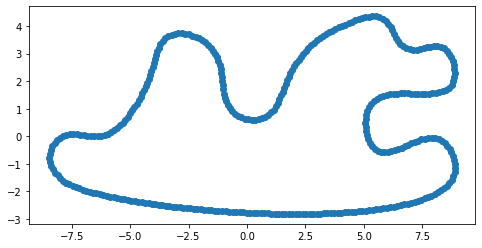

In [4]:
fig = plt.figure(figsize=(8,4))
plt.scatter(x, y)

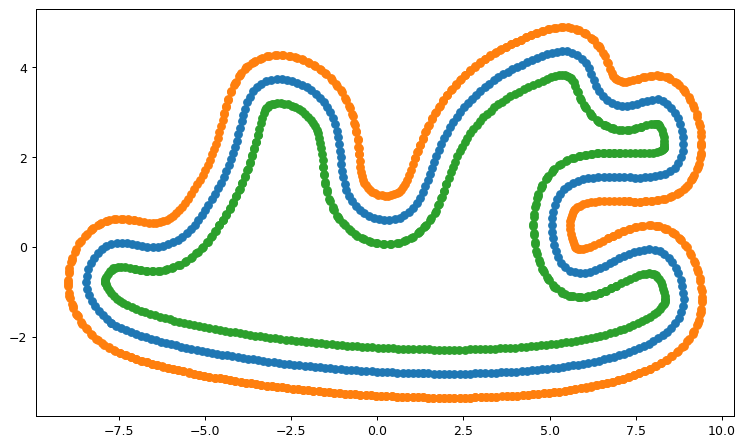

In [5]:
#create outer and inner border track limits
from shapely.geometry import LineString
from shapely.geometry import Point
waypoints = LineString(df['waypoints'])
outer_border = waypoints.parallel_offset(1.07/2, 'left', join_style=1, resolution=16)
inner_border = waypoints.parallel_offset(1.07/2, 'right', join_style=1,resolution=16)

fig = plt.figure(1, figsize=(22,6), dpi=90)
ax = fig.add_subplot(121)

x1, y1 = waypoints.xy
ax.scatter(x1, y1)
x2, y2 = outer_border.xy
ax.scatter(x2, y2)
x3, y3 = inner_border.xy
ax.scatter(x3, y3)

In [6]:
print('Length of autogenerated inner and outer border points are not the same!!!')
print("center: ", len(x1))
print("outer: ", len(x2))
print("inner: ", len(x3))

Length of autogenerated inner and outer border points are not the same!!!
center:  354
outer:  640
inner:  473


In [7]:
#Interpolate inner and outer border to the same number of points as central waypoints
pt_outer = []
pt_inner = []

for point in df['waypoints']:
    pt = Point(point)
    pt_outer.append(outer_border.interpolate(outer_border.project(pt)))
    pt_inner.append(inner_border.interpolate(inner_border.project(pt)))

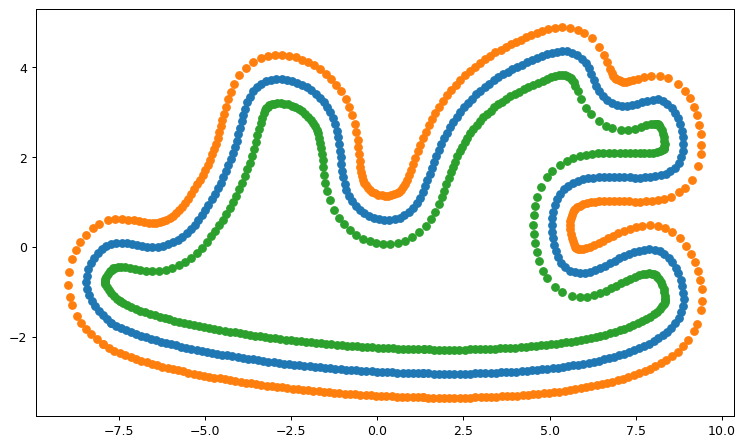

In [8]:
outer_border = LineString(pt_outer)
inner_border = LineString(pt_inner)

fig = plt.figure(1, figsize=(22,6), dpi=90)
ax = fig.add_subplot(121)

x1, y1 = waypoints.xy
ax.scatter(x1, y1)
x2, y2 = outer_border.xy
ax.scatter(x2, y2)
x3, y3 = inner_border.xy
ax.scatter(x3, y3)

In [9]:
print("Length of all three tracklines are now the same")
print("center: ", len(x1))
print("outer: ", len(x2))
print("inner: ", len(x3))

Length of all three tracklines are now the same
center:  354
outer:  354
inner:  354


In [10]:
#Save in same numpy format as trackfiles
track = np.array([list(a) for a in zip(x1, y1, x2, y2, x3, y3)])
np.save("tracks/Fumiaki_loop.npy",track)

Loaded 354 waypoints


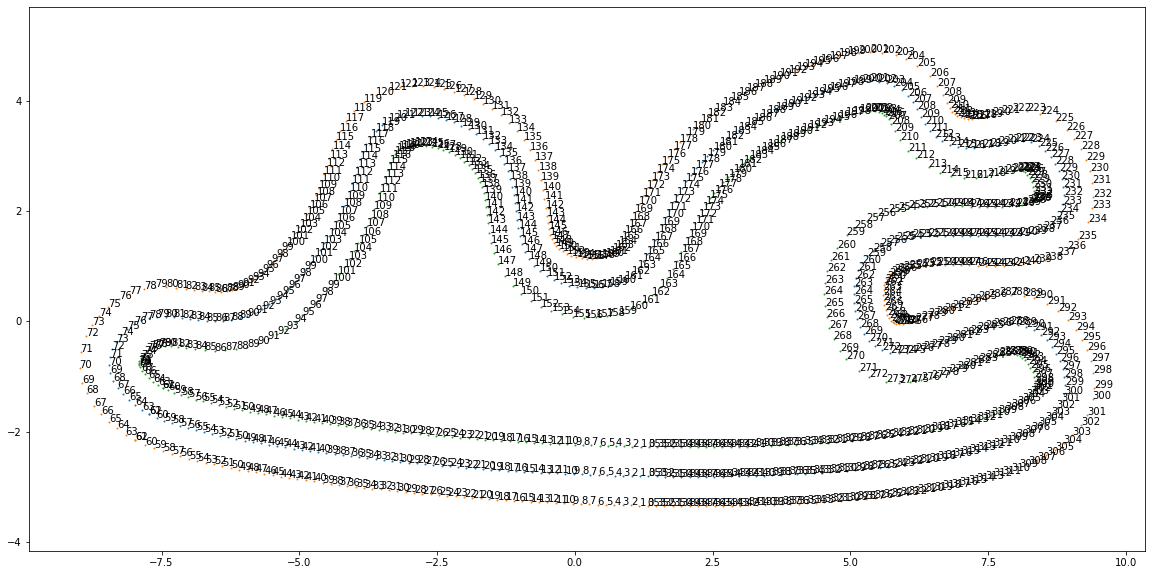

In [11]:
#Check output
track: Track = tu.load_track("Fumiaki_loop")
pu.plot_trackpoints(track)